# Part - 1
## Cleaning and Analyzing "US Census Data"

In [305]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt

In [298]:
us_census = pd.concat([pd.read_csv(files) for fies in glob.glob('states*.csv')], ignore_index = True)
display(us_census.head())

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,0,Utah,2903379,13.468376068376063%,79.40683760683764%,1.0179487179487194%,1.0813675213675222%,2.196068376068376%,0.8259829059829059%,$63488.91780821918,1459229M_1444150F
1,1,Vermont,626604,1.6092896174863391%,93.98306010928961%,0.9808743169398909%,0.301639344262295%,1.2387978142076501%,0.03060109289617486%,$55602.96721311475,308573M_318031F
2,2,Virginia,8256630,8.0110164981373%,63.271048430015945%,20.17599787120807%,0.21245343267695582%,5.455242150079845%,0.06471527408195847%,$72866.01341201717,4060948M_4195682F
3,3,Washington,6985464,11.140968858131506%,72.03840830449816%,3.384429065743947%,1.4107266435986163%,7.022006920415224%,0.609896193771627%,$64493.76768377254,3487725M_3497739F
4,4,West Virginia,1851420,1.290909090909089%,92.17623966942146%,3.6628099173553723%,0.15268595041322316%,0.6824380165289253%,0.02644628099173554%,$41437.11157024794,913631M_937789F


In [299]:
print(us_census.columns)
print()
for col in us_census.columns:
    print(us_census[col].dtype)

Index(['Unnamed: 0', 'State', 'TotalPop', 'Hispanic', 'White', 'Black',
       'Native', 'Asian', 'Pacific', 'Income', 'GenderPop'],
      dtype='object')

int64
object
int64
object
object
object
object
object
object
object
object


In [300]:
display(us_census.head())

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,0,Utah,2903379,13.468376068376063%,79.40683760683764%,1.0179487179487194%,1.0813675213675222%,2.196068376068376%,0.8259829059829059%,$63488.91780821918,1459229M_1444150F
1,1,Vermont,626604,1.6092896174863391%,93.98306010928961%,0.9808743169398909%,0.301639344262295%,1.2387978142076501%,0.03060109289617486%,$55602.96721311475,308573M_318031F
2,2,Virginia,8256630,8.0110164981373%,63.271048430015945%,20.17599787120807%,0.21245343267695582%,5.455242150079845%,0.06471527408195847%,$72866.01341201717,4060948M_4195682F
3,3,Washington,6985464,11.140968858131506%,72.03840830449816%,3.384429065743947%,1.4107266435986163%,7.022006920415224%,0.609896193771627%,$64493.76768377254,3487725M_3497739F
4,4,West Virginia,1851420,1.290909090909089%,92.17623966942146%,3.6628099173553723%,0.15268595041322316%,0.6824380165289253%,0.02644628099173554%,$41437.11157024794,913631M_937789F


In [301]:
# Use regex to turn the Income column into a format that is ready for conversion into a numerical type.
match = "$"
us_census["Income"] = us_census["Income"].str.replace(match, "")
us_census["Income"] = us_census["Income"].apply(pd.to_numeric)
print(us_census.dtypes)
display(us_census.head())

Unnamed: 0      int64
State          object
TotalPop        int64
Hispanic       object
White          object
Black          object
Native         object
Asian          object
Pacific        object
Income        float64
GenderPop      object
dtype: object


,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,0,Utah,2903379,13.468376068376063%,79.40683760683764%,1.0179487179487194%,1.0813675213675222%,2.196068376068376%,0.8259829059829059%,63488.917808,1459229M_1444150F
1,1,Vermont,626604,1.6092896174863391%,93.98306010928961%,0.9808743169398909%,0.301639344262295%,1.2387978142076501%,0.03060109289617486%,55602.967213,308573M_318031F
2,2,Virginia,8256630,8.0110164981373%,63.271048430015945%,20.17599787120807%,0.21245343267695582%,5.455242150079845%,0.06471527408195847%,72866.013412,4060948M_4195682F
3,3,Washington,6985464,11.140968858131506%,72.03840830449816%,3.384429065743947%,1.4107266435986163%,7.022006920415224%,0.609896193771627%,64493.767684,3487725M_3497739F
4,4,West Virginia,1851420,1.290909090909089%,92.17623966942146%,3.6628099173553723%,0.15268595041322316%,0.6824380165289253%,0.02644628099173554%,41437.111570,913631M_937789F


In [302]:
us_census[['Male','Female']] = us_census.GenderPop.str.split("_",expand=True) 
display(us_census.head())

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,Male,Female
0,0,Utah,2903379,13.468376068376063%,79.40683760683764%,1.0179487179487194%,1.0813675213675222%,2.196068376068376%,0.8259829059829059%,63488.917808,1459229M_1444150F,1459229M,1444150F
1,1,Vermont,626604,1.6092896174863391%,93.98306010928961%,0.9808743169398909%,0.301639344262295%,1.2387978142076501%,0.03060109289617486%,55602.967213,308573M_318031F,308573M,318031F
2,2,Virginia,8256630,8.0110164981373%,63.271048430015945%,20.17599787120807%,0.21245343267695582%,5.455242150079845%,0.06471527408195847%,72866.013412,4060948M_4195682F,4060948M,4195682F
3,3,Washington,6985464,11.140968858131506%,72.03840830449816%,3.384429065743947%,1.4107266435986163%,7.022006920415224%,0.609896193771627%,64493.767684,3487725M_3497739F,3487725M,3497739F
4,4,West Virginia,1851420,1.290909090909089%,92.17623966942146%,3.6628099173553723%,0.15268595041322316%,0.6824380165289253%,0.02644628099173554%,41437.111570,913631M_937789F,913631M,937789F


In [303]:
male = "M"
female = "F"
us_census["Male"] = us_census["Male"].str.replace(male, "")
us_census["Female"] = us_census["Female"].str.replace(female, "")
display(us_census.head())

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,Male,Female
0,0,Utah,2903379,13.468376068376063%,79.40683760683764%,1.0179487179487194%,1.0813675213675222%,2.196068376068376%,0.8259829059829059%,63488.917808,1459229M_1444150F,1459229,1444150
1,1,Vermont,626604,1.6092896174863391%,93.98306010928961%,0.9808743169398909%,0.301639344262295%,1.2387978142076501%,0.03060109289617486%,55602.967213,308573M_318031F,308573,318031
2,2,Virginia,8256630,8.0110164981373%,63.271048430015945%,20.17599787120807%,0.21245343267695582%,5.455242150079845%,0.06471527408195847%,72866.013412,4060948M_4195682F,4060948,4195682
3,3,Washington,6985464,11.140968858131506%,72.03840830449816%,3.384429065743947%,1.4107266435986163%,7.022006920415224%,0.609896193771627%,64493.767684,3487725M_3497739F,3487725,3497739
4,4,West Virginia,1851420,1.290909090909089%,92.17623966942146%,3.6628099173553723%,0.15268595041322316%,0.6824380165289253%,0.02644628099173554%,41437.111570,913631M_937789F,913631,937789


In [304]:
us_census[['Male','Female']] = us_census[['Male','Female']].apply(pd.to_numeric)
print(us_census.dtypes)
display(us_census.head())

Unnamed: 0      int64
State          object
TotalPop        int64
Hispanic       object
White          object
Black          object
Native         object
Asian          object
Pacific        object
Income        float64
GenderPop      object
Male            int64
Female          int64
dtype: object


,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,Male,Female
0,0,Utah,2903379,13.468376068376063%,79.40683760683764%,1.0179487179487194%,1.0813675213675222%,2.196068376068376%,0.8259829059829059%,63488.917808,1459229M_1444150F,1459229,1444150
1,1,Vermont,626604,1.6092896174863391%,93.98306010928961%,0.9808743169398909%,0.301639344262295%,1.2387978142076501%,0.03060109289617486%,55602.967213,308573M_318031F,308573,318031
2,2,Virginia,8256630,8.0110164981373%,63.271048430015945%,20.17599787120807%,0.21245343267695582%,5.455242150079845%,0.06471527408195847%,72866.013412,4060948M_4195682F,4060948,4195682
3,3,Washington,6985464,11.140968858131506%,72.03840830449816%,3.384429065743947%,1.4107266435986163%,7.022006920415224%,0.609896193771627%,64493.767684,3487725M_3497739F,3487725,3497739
4,4,West Virginia,1851420,1.290909090909089%,92.17623966942146%,3.6628099173553723%,0.15268595041322316%,0.6824380165289253%,0.02644628099173554%,41437.111570,913631M_937789F,913631,937789


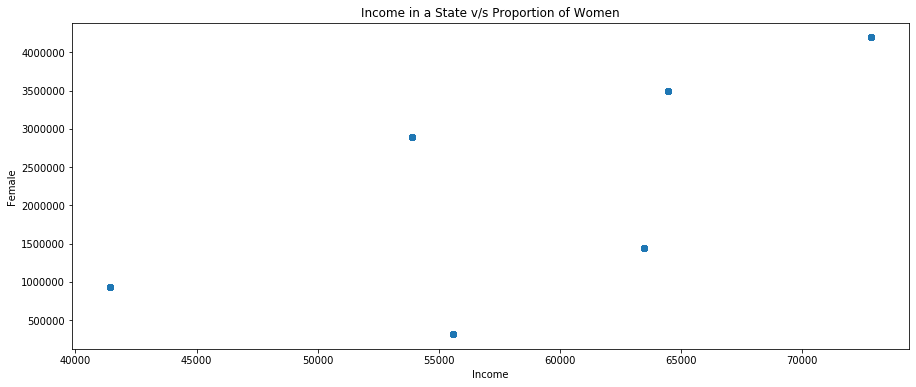

In [327]:
#display(us_census)
plt.figure(figsize=(15, 6))
plt.xlabel('Income')
plt.ylabel('Female')
plt.title("Income in a State v/s Proportion of Women")
plt.scatter(us_census["Income"], us_census["Female"])
plt.show()

In [333]:
us_census.isnull().any()
# us_census.notnull()

Unnamed: 0    False
State         False
TotalPop      False
Hispanic      False
White         False
Black         False
Native        False
Asian         False
Pacific       False
Income        False
GenderPop     False
Male          False
Female        False
dtype: bool

In [334]:
us_census.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6      True
7      True
8      True
9      True
10     True
11     True
12     True
13     True
14     True
15     True
16     True
17     True
18     True
19     True
20     True
21     True
22     True
23     True
24     True
25     True
26     True
27     True
28     True
29     True
30     True
31     True
32     True
33     True
34     True
35     True
36     True
37     True
38     True
39     True
40     True
41     True
42     True
43     True
44     True
45     True
46     True
47     True
48     True
49     True
50     True
51     True
52     True
53     True
54     True
55     True
56     True
57     True
58     True
59     True
dtype: bool

In [337]:
new_us_census = us_census.drop_duplicates()
display(new_us_census)

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,Male,Female
0,0,Utah,2903379,13.468376068376063%,79.40683760683764%,1.0179487179487194%,1.0813675213675222%,2.196068376068376%,0.8259829059829059%,63488.917808,1459229M_1444150F,1459229,1444150
1,1,Vermont,626604,1.6092896174863391%,93.98306010928961%,0.9808743169398909%,0.301639344262295%,1.2387978142076501%,0.03060109289617486%,55602.967213,308573M_318031F,308573,318031
2,2,Virginia,8256630,8.0110164981373%,63.271048430015945%,20.17599787120807%,0.21245343267695582%,5.455242150079845%,0.06471527408195847%,72866.013412,4060948M_4195682F,4060948,4195682
3,3,Washington,6985464,11.140968858131506%,72.03840830449816%,3.384429065743947%,1.4107266435986163%,7.022006920415224%,0.609896193771627%,64493.767684,3487725M_3497739F,3487725,3497739
4,4,West Virginia,1851420,1.290909090909089%,92.17623966942146%,3.6628099173553723%,0.15268595041322316%,0.6824380165289253%,0.02644628099173554%,41437.111570,913631M_937789F,913631,937789
5,5,Wisconsin,5742117,6.683333333333334%,79.86400862068966%,8.195186781609202%,0.9536637931034483%,2.404238505747124%,0.020833333333333332%,53898.889209,2851385M_2890732F,2851385,2890732


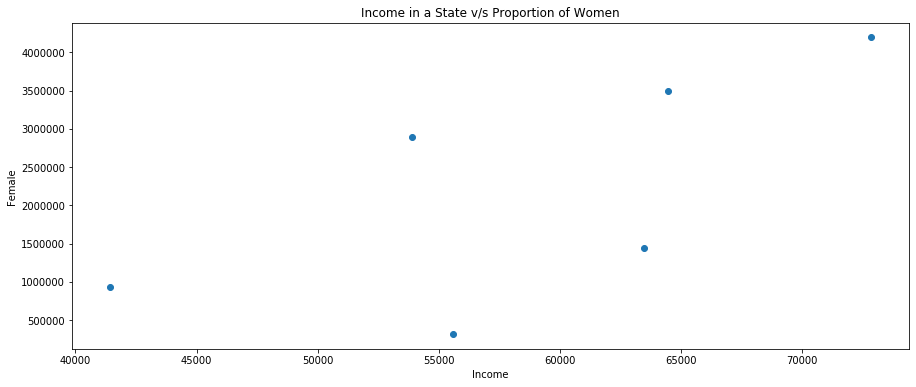

In [338]:
plt.figure(figsize=(15, 6))
plt.xlabel('Income')
plt.ylabel('Female')
plt.title("Income in a State v/s Proportion of Women")
plt.scatter(new_us_census["Income"], new_us_census["Female"])
plt.show()

In [367]:
race = new_us_census[["Hispanic", "White", "Black", "Native", "Asian", "Pacific"]]
display(race)

,Hispanic,White,Black,Native,Asian,Pacific
0,13.468376068376063%,79.40683760683764%,1.0179487179487194%,1.0813675213675222%,2.196068376068376%,0.8259829059829059%
1,1.6092896174863391%,93.98306010928961%,0.9808743169398909%,0.301639344262295%,1.2387978142076501%,0.03060109289617486%
2,8.0110164981373%,63.271048430015945%,20.17599787120807%,0.21245343267695582%,5.455242150079845%,0.06471527408195847%
3,11.140968858131506%,72.03840830449816%,3.384429065743947%,1.4107266435986163%,7.022006920415224%,0.609896193771627%
4,1.290909090909089%,92.17623966942146%,3.6628099173553723%,0.15268595041322316%,0.6824380165289253%,0.02644628099173554%
5,6.683333333333334%,79.86400862068966%,8.195186781609202%,0.9536637931034483%,2.404238505747124%,0.020833333333333332%


In [368]:
print(race.dtypes)
percent = "%"
race = race.replace(percent, "", regex=True)
race = race.apply(pd.to_numeric)
display(race)
print(race.dtypes)

Hispanic    object
White       object
Black       object
Native      object
Asian       object
Pacific     object
dtype: object


,Hispanic,White,Black,Native,Asian,Pacific
0,13.468376,79.406838,1.017949,1.081368,2.196068,0.825983
1,1.609290,93.983060,0.980874,0.301639,1.238798,0.030601
2,8.011016,63.271048,20.175998,0.212453,5.455242,0.064715
3,11.140969,72.038408,3.384429,1.410727,7.022007,0.609896
4,1.290909,92.176240,3.662810,0.152686,0.682438,0.026446
5,6.683333,79.864009,8.195187,0.953664,2.404239,0.020833


Hispanic    float64
White       float64
Black       float64
Native      float64
Asian       float64
Pacific     float64
dtype: object


In [369]:
print(race.isnull().any())
print()
print(race.duplicated())

Hispanic    False
White       False
Black       False
Native      False
Asian       False
Pacific     False
dtype: bool

0    False
1    False
2    False
3    False
4    False
5    False
dtype: bool


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021FCF888BC8>,
      dtype=object)

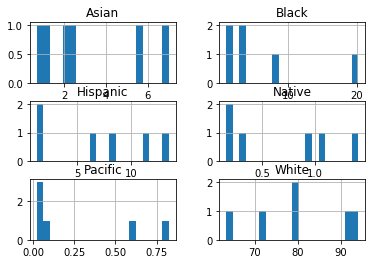

In [379]:
# Plotting Histogram of each Race

race.hist(bins = 20)

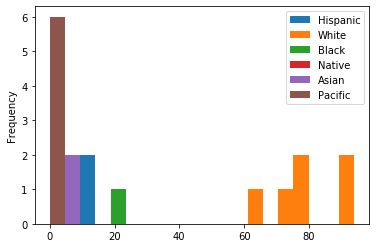

In [380]:
# Plotting Histogram Combined

race.plot.hist(bins = 20)

# Part - 2
## Petal Power Inventory

In [114]:
import pandas as pd
import numpy as np

In [115]:
! type "inventory.csv"

location,product_type,product_description,quantity,price
Staten Island,seeds,daisy,4,6.99
Staten Island,seeds,calla lily,46,19.99
Staten Island,seeds,tomato,85,13.99
Staten Island,garden tools,rake,4,13.99
Staten Island,garden tools,wheelbarrow,0,89.99
Staten Island,garden tools,spade,93,19.99
Staten Island,pest_control,insect killer,74,12.99
Staten Island,pest_control,weed killer,8,23.99
Staten Island,planter,20 inch terracotta planter,0,17.99
Staten Island,planter,8 inch plastic planter,53,3.99
Brooklyn,seeds,daisy,50,6.99
Brooklyn,seeds,calla lily,0,19.99
Brooklyn,seeds,tomato,0,13.99
Brooklyn,garden tools,rake,15,13.99
Brooklyn,garden tools,wheelbarrow,82,89.99
Brooklyn,garden tools,spade,36,19.99
Brooklyn,pest_control,insect killer,80,12.99
Brooklyn,pest_control,weed killer,76,23.99
Brooklyn,planter,20 inch terracotta planter,5,17.99
Brooklyn,planter,8 inch plastic planter,26,3.99
Queens,seeds,daisy,57,6.99
Queens,seeds,calla lily,95,19.99
Queens,seeds,tomato,45,13.99
Queens,garde

In [116]:
inventory = pd.read_csv("inventory.csv")
# display(inventory.head(10))
staten_island = inventory[:10]
# display(staten_island)
product_request = staten_island.product_type
display(product_request)
a, b , c ,d = product_request.unique()
print("Products sold in Staten Island are: {0}, {1}, {2}, and {3}".format(a, b, c, d))

0           seeds
1           seeds
2           seeds
3    garden tools
4    garden tools
5    garden tools
6    pest_control
7    pest_control
8         planter
9         planter
Name: product_type, dtype: object

Products sold in Staten Island are: seeds, garden tools, pest_control, and planter


In [117]:
brooklyn = inventory[inventory.location == "Brooklyn"]
seed_request = brooklyn[brooklyn.product_type == "seeds"]
display(seed_request)
t1, t2, t3 = seed_request.product_description.unique()
print("The types of seeds in Brooklyn is: {0}, {1}, and {2}".format(t1, t2, t3))

,location,product_type,product_description,quantity,price
10,Brooklyn,seeds,daisy,50,6.99
11,Brooklyn,seeds,calla lily,0,19.99
12,Brooklyn,seeds,tomato,0,13.99


The types of seeds in Brooklyn is: daisy, calla lily, and tomato


In [118]:
# Add a column to inventory called in_stock which is True if quantity is greater than 0 and False if quantity equals 0.
inventory["in_stock"] = inventory.quantity > 0
display(inventory)

,location,product_type,product_description,quantity,price,in_stock
0,Staten Island,seeds,daisy,4,6.99,True
1,Staten Island,seeds,calla lily,46,19.99,True
2,Staten Island,seeds,tomato,85,13.99,True
3,Staten Island,garden tools,rake,4,13.99,True
4,Staten Island,garden tools,wheelbarrow,0,89.99,False
5,Staten Island,garden tools,spade,93,19.99,True
6,Staten Island,pest_control,insect killer,74,12.99,True
7,Staten Island,pest_control,weed killer,8,23.99,True
8,Staten Island,planter,20 inch terracotta planter,0,17.99,False
9,Staten Island,planter,8 inch plastic planter,53,3.99,True


In [119]:
# Petal Power wants to know how valuable their current inventory is.
# Create a column called total_value that is equal to price multiplied by quantity.

inventory["total_value"] = inventory.price * inventory.quantity
display(inventory)

,location,product_type,product_description,quantity,price,in_stock,total_value
0,Staten Island,seeds,daisy,4,6.99,True,27.96
1,Staten Island,seeds,calla lily,46,19.99,True,919.54
2,Staten Island,seeds,tomato,85,13.99,True,1189.15
3,Staten Island,garden tools,rake,4,13.99,True,55.96
4,Staten Island,garden tools,wheelbarrow,0,89.99,False,0.00
5,Staten Island,garden tools,spade,93,19.99,True,1859.07
6,Staten Island,pest_control,insect killer,74,12.99,True,961.26
7,Staten Island,pest_control,weed killer,8,23.99,True,191.92
8,Staten Island,planter,20 inch terracotta planter,0,17.99,False,0.00
9,Staten Island,planter,8 inch plastic planter,53,3.99,True,211.47


In [120]:
inventory["full_description"] = inventory["product_type"].str.cat(inventory["product_description"], sep = " - ")
display(inventory)

,location,product_type,product_description,quantity,price,in_stock,total_value,full_description
0,Staten Island,seeds,daisy,4,6.99,True,27.96,seeds - daisy
1,Staten Island,seeds,calla lily,46,19.99,True,919.54,seeds - calla lily
2,Staten Island,seeds,tomato,85,13.99,True,1189.15,seeds - tomato
3,Staten Island,garden tools,rake,4,13.99,True,55.96,garden tools - rake
4,Staten Island,garden tools,wheelbarrow,0,89.99,False,0.00,garden tools - wheelbarrow
5,Staten Island,garden tools,spade,93,19.99,True,1859.07,garden tools - spade
6,Staten Island,pest_control,insect killer,74,12.99,True,961.26,pest_control - insect killer
7,Staten Island,pest_control,weed killer,8,23.99,True,191.92,pest_control - weed killer
8,Staten Island,planter,20 inch terracotta planter,0,17.99,False,0.00,planter - 20 inch terracotta planter
9,Staten Island,planter,8 inch plastic planter,53,3.99,True,211.47,planter - 8 inch plastic planter
